In [11]:
import numpy as np
from helpers import load_csv_data, create_csv_submission
import matplotlib.pyplot as plt
from imputation_methods import impute_median
from scalers import NormalScaler
from implementations import *

data_path = "data/dataset/"

In [2]:
data = load_csv_data(data_path)

In [3]:
x_train, x_test, y_train, train_ids, test_ids = data

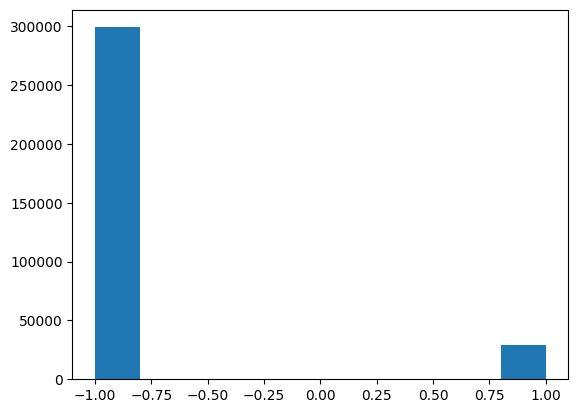

In [4]:
plt.figure()
plt.hist(y_train);
plt.show()

# should transform y_train into {0, 1}


In [5]:
# imputing with median
x_train_imp = impute_median(x_train)

In [6]:
# scaling

scaler = NormalScaler()
x_train_scaled = scaler.fit_scale(x_train_imp)
print(x_train_scaled.shape)

(328135, 321)


In [23]:
from sklearn.model_selection import train_test_split
y_train[y_train==-1] = 0
tx_train_scaled = np.hstack((np.ones((len(x_train_scaled), 1)), x_train_scaled))
x_tr, x_te, y_tr, y_te = train_test_split(tx_train_scaled, y_train, test_size=0.2)
print(x_tr.shape)

(262508, 322)


In [54]:
N = 300
w_init = np.zeros(N)
w, loss = logistic_regression(y_tr, x_tr[:,:N], w_init, 10000, 0.2)

In [55]:
compute_logistic_loss(y_te, x_te[:,:N], w)

0.22839953064370375